<a href="https://colab.research.google.com/github/Akshitha2403/FDS_PROJECT/blob/main/predicting_loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_u6lujuX_CVtuZ9i.csv")


In [5]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_Y3wMUE5_7gLdaTN.csv")


In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
data = pd.concat([train, test], sort=False)

In [12]:
data.fillna(method='ffill', inplace=True)

/tmp/ipython-input-12-2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [14]:
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col].astype(str))


In [17]:
train_cleaned = data[:len(train)]
test_cleaned = data[len(train):]

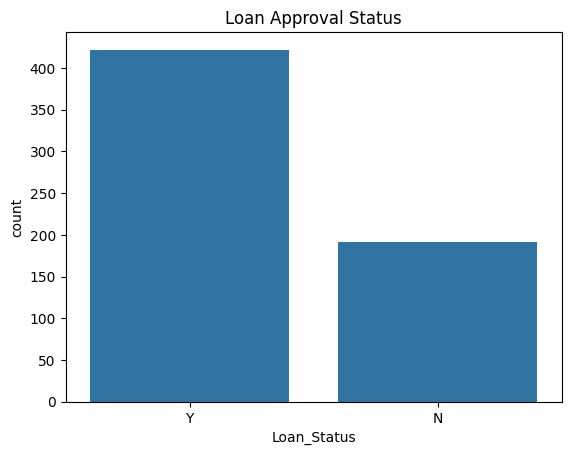

In [18]:
sns.countplot(data=train, x='Loan_Status')
plt.title('Loan Approval Status')
plt.show()

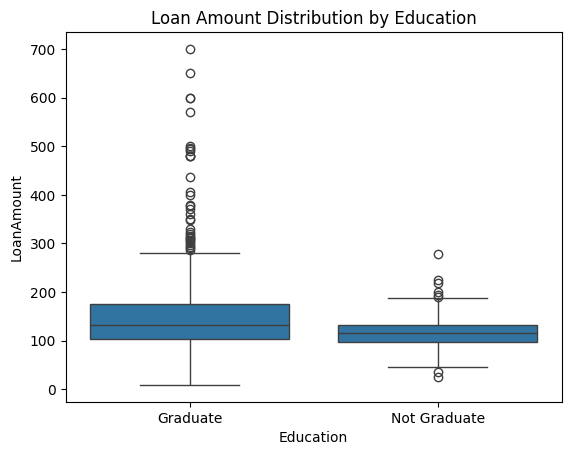

In [19]:
sns.boxplot(data=train, x='Education', y='LoanAmount')
plt.title('Loan Amount Distribution by Education')
plt.show()

In [21]:
X = train_cleaned.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = train_cleaned['Loan_Status']

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred = model.predict(X_val)

In [25]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.7723577235772358
[[19 24]
 [ 4 76]]
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



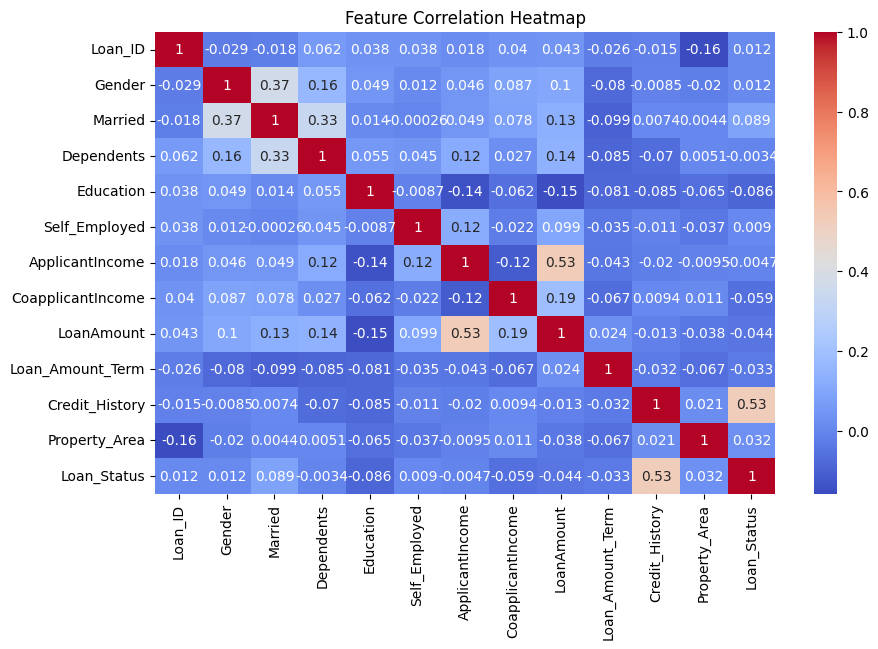

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(train_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

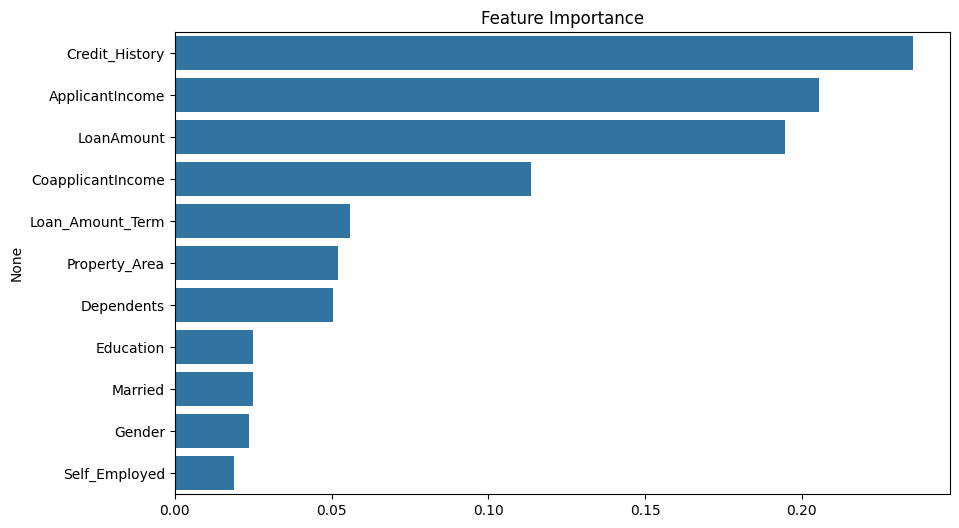

In [43]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance')
plt.show()

In [26]:
X_test = test_cleaned.drop(['Loan_Status', 'Loan_ID'], axis=1)
test_preds = model.predict(X_test)

In [27]:
submission = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],
    'Loan_Status': test_preds
})
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})
submission.to_csv("loan_submission.csv", index=False)


In [40]:
print(submission.head())

    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y


In [41]:
print(submission.tail())

      Loan_ID Loan_Status
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y
